In [160]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [161]:
II = 0.36 # charge and discharge current
dch = pd.read_csv("in/KM_MT.001", sep="\s+", header = 0, names = ["t", "U"], skiprows=0, usecols=[0, 1], decimal=",")
dch["U"] = dch["U"]/1000
dch["Q"] = dch["t"] * II / 3600 * 1000 # mAh 

In [162]:
II2 = 0.018 # charge and discharge current
df_discharge = pd.read_csv("in/DCH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")
df_discharge["Q"] = df_discharge["t"] * II2 / 3600 * 1000 # mAh 

discharge = []

print(dch["U"][0])
result_index = df_discharge["U"].sub(dch["U"][0]).abs().idxmin()

print(result_index)
df_discharge1 = df_discharge[result_index:].copy()
df_discharge1.index = np.arange(len(df_discharge1))
df_discharge1["Q"] = df_discharge1["Q"] - df_discharge1["Q"][0]
df_discharge1["t"] = df_discharge1["t"] - df_discharge1["t"][0]
df_discharge1

# for i in range(len(df_discharge1["Q"])):
    # df_discharge1.loc[i, "Q"] = df_discharge1.loc[i, "Q"] - df_discharge1.loc[]

# for i in range(min, len(df_discharge["Q"])):
    # discharge.append([df_discharge["Q"][i], df_discharge["U"][i]])

4.044
317


,t,U,Q
0,0.0,4.043884,0.0000
1,20.0,4.043274,0.1000
2,40.0,4.042664,0.2000
3,60.0,4.042053,0.3000
4,80.0,4.041443,0.4000
...,...,...,...
1590,31800.0,2.758484,159.0000
1591,31820.0,2.722778,159.1000
1592,31840.0,2.683411,159.2000
1593,31860.0,2.640686,159.3000


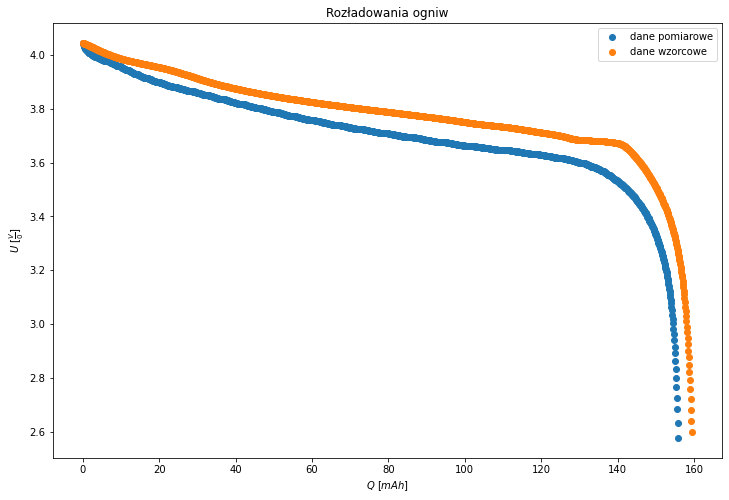

In [163]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(dch["Q"], dch["U"], 'o', label="dane pomiarowe")
ax.plot(df_discharge1["Q"], df_discharge1["U"], 'o', label="dane wzorcowe")
ax.set_xlabel(r"$Q$ [$mAh$]")
ax.set_ylabel(r"$U$ [$\frac{V}{0}$]")
ax.set_title("Rozładowania ogniw")
ax.legend()
fig.savefig("out/compare_discharge.jpg")

plt.show()

In [164]:
# moj sposob
dU = []
dt = []

energy_discharge = 0

for i in range(0, len(dch["U"])-1):
    dU.append((df_discharge1["U"][i+1]+df_discharge1["U"][i])/2)
    dt.append((df_discharge1["t"][i+1]-df_discharge1["t"][i]))

for i in range(0, len(dU)):
    energy_discharge += dU[i]*dt[i]*II2

energy_discharge

2126.815195139999

In [165]:
df_charge = pd.read_csv("in/CH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")
df_charge["Q"] = df_charge["t"] * II2 / 3600 * 1000 # mAh 

In [166]:
ch = pd.read_csv("in/KM_MT.003", sep="\s+", header = 0, names = ["t", "U"], skiprows=0, usecols=[0, 1], decimal=",")

ch["t0"] = ch["t"] - ch["t"][0]

ch["U"] = ch["U"]/1000
ch["Q"] = ch["t0"] * II / 3600 * 1000 # mAh 

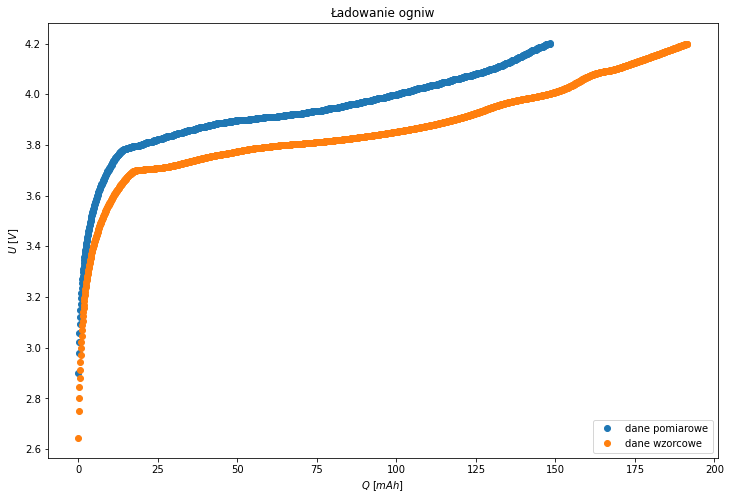

In [167]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(ch["Q"], ch["U"], 'o', label="dane pomiarowe")
ax.plot(df_charge["Q"], df_charge["U"], 'o', label="dane wzorcowe")

ax.set_xlabel(r"$Q$ [$mAh$]")
ax.set_ylabel(r"$U$ [$V$]")
ax.set_title("Ładowanie ogniw")
ax.legend(loc=4)
fig.savefig("out/compare_charged.jpg")

plt.show()